In [1]:
# import os + os.chir is used to get to the llms directory to use the usermodules 
import os
os.chdir('C:/Users/AViey/OneDrive/Documents/College/UCI/Stats/stats170a/copilot/copilot/llms/user_modules') 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from  db import Session, get_training_data, get_model_sentiment_data, add_sentiment_evaluation_data
from table_instances import SentimentEvaluation
import pandas as pd
from sklearn.metrics import accuracy_score

session = Session()

Gather Data from different models plus the training data

In [2]:
train_df = get_training_data()
train_df.head()

,dialogue_id,dataset,dialogue_text,actual_summary,actual_sentiment
0,3816,training,"#Person1#: Good morning, sir. Is there anythin...",#Person2# wants a suit made in 100 % black Bar...,neutral
1,3,training,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,positive
2,4,training,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,negative
3,5,training,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,positive
4,6,training,"#Person1#: Happy birthday, Aims!\n#Person2#: T...",Lisa gives Aims a birthday present and Aims lo...,positive


Mistral Sentiment

In [3]:
mistral_sentiment = get_model_sentiment_data('mistral 7b')
mistral_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,1,1,mistral 7b,neutral,None,None
1,2,2,mistral 7b,neutral,None,None
2,3,3,mistral 7b,positive,None,None
3,4,4,mistral 7b,negative,None,None
4,5,5,mistral 7b,positive,None,None


Gemma Sentiment

In [4]:
gemma_sentiment = get_model_sentiment_data("gemma 7b")
gemma_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,12428,3816,gemma 7b,positive,32950.429688,0.743105
1,12429,3,gemma 7b,positive,33164.658691,0.858522
2,12430,4,gemma 7b,neutral,33163.166504,0.802573
3,12431,5,gemma 7b,positive,33124.416504,0.993101
4,12432,6,gemma 7b,positive,32954.593750,1.409419


Llama 3 sentiment

In [5]:
llama3_sentiment = get_model_sentiment_data('llama 3 8b')
llama3_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,25855,3816,llama 3 8b,positive,31030.074219,3.045265
1,25856,3,llama 3 8b,positive,31099.045410,2.877197
2,25857,4,llama 3 8b,neutral,31097.461426,2.877703
3,25858,5,llama 3 8b,positive,31085.316406,2.831945
4,25859,6,llama 3 8b,positive,31031.229492,2.781226


Falcon Sentiment

In [6]:
falcon_sentiment = get_model_sentiment_data('falcon 7b')
falcon_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,38282,3816,falcon 7b,positive,26544.150391,0.616156
1,38283,3,falcon 7b,positive,26566.411621,0.252410
2,38284,4,falcon 7b,positive,26565.179688,0.284257
3,38285,5,falcon 7b,positive,26562.931641,0.251904
4,38286,6,falcon 7b,positive,26546.044922,0.220447


Compute confusion matrix for mistral

In [7]:
conf_mat_mistral = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        mistral_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_mistral.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


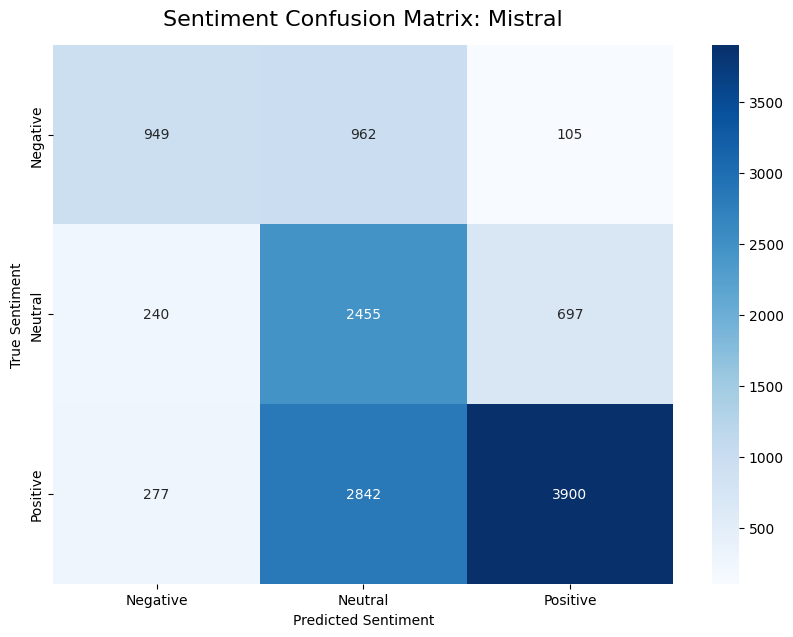

In [8]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix1 = confusion_matrix(conf_mat_mistral['actual_sentiment'], conf_mat_mistral['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Mistral', fontsize=16, pad=14)
plt.show()

Mistral accuracy score

In [9]:
accuracy_mistral = accuracy_score(conf_mat_mistral["actual_sentiment"], conf_mat_mistral["generated_sentiment"])
print(f"Overall accuracy: {accuracy_mistral:.2f}")

Overall accuracy: 0.59


Compute confusion matrix for gemma

In [10]:
conf_mat_gemma = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        gemma_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_gemma.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


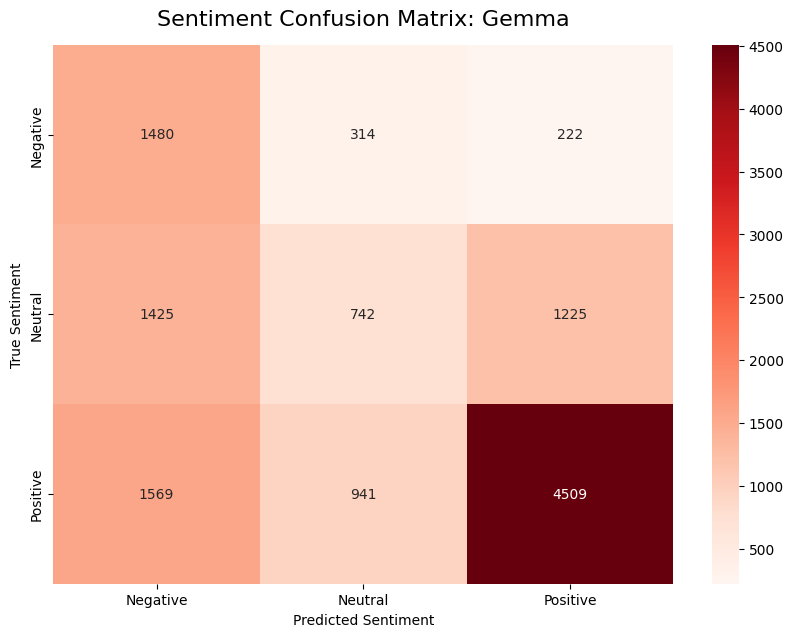

In [11]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix2 = confusion_matrix(conf_mat_gemma['actual_sentiment'], conf_mat_gemma['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap="Reds",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Gemma', fontsize=16, pad=14)
plt.show()

In [12]:
accuracy_gemma = accuracy_score(conf_mat_gemma["actual_sentiment"], conf_mat_gemma["generated_sentiment"])
print(f"Overall accuracy: {accuracy_gemma:.2f}")

Overall accuracy: 0.54


Compute Confusion Matrix for LLama 3

In [13]:
conf_mat_llama3 = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        llama3_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_llama3.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


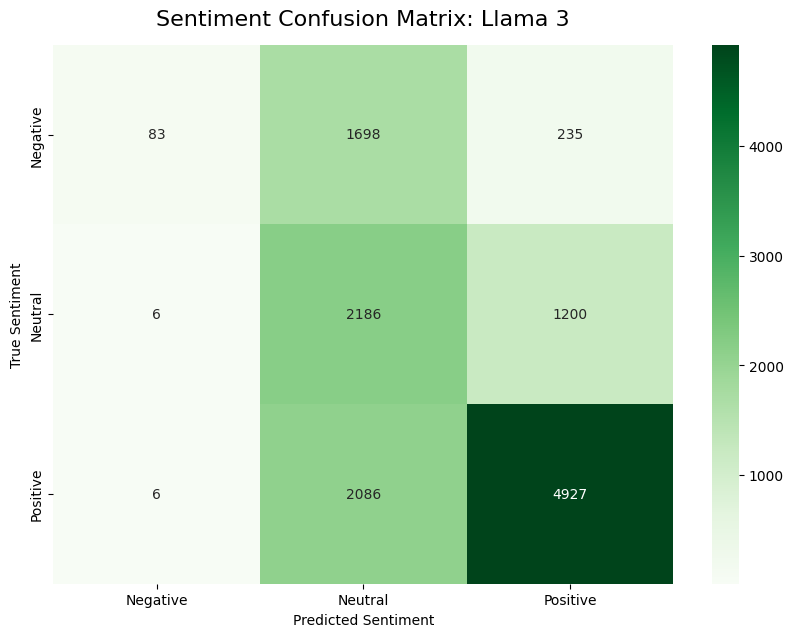

In [14]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix3 = confusion_matrix(conf_mat_llama3['actual_sentiment'], conf_mat_llama3['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Llama 3', fontsize=16, pad=14)
plt.show()

In [15]:
accuracy_llama3 = accuracy_score(conf_mat_llama3["actual_sentiment"], conf_mat_llama3["generated_sentiment"])
print(f"Overall accuracy: {accuracy_llama3:.2f}")

Overall accuracy: 0.58


Falcon: Confusion Matrix & Acc. Score

In [16]:
conf_mat_falcon = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        falcon_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_falcon.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,positive
3,5,positive,positive
4,6,positive,positive


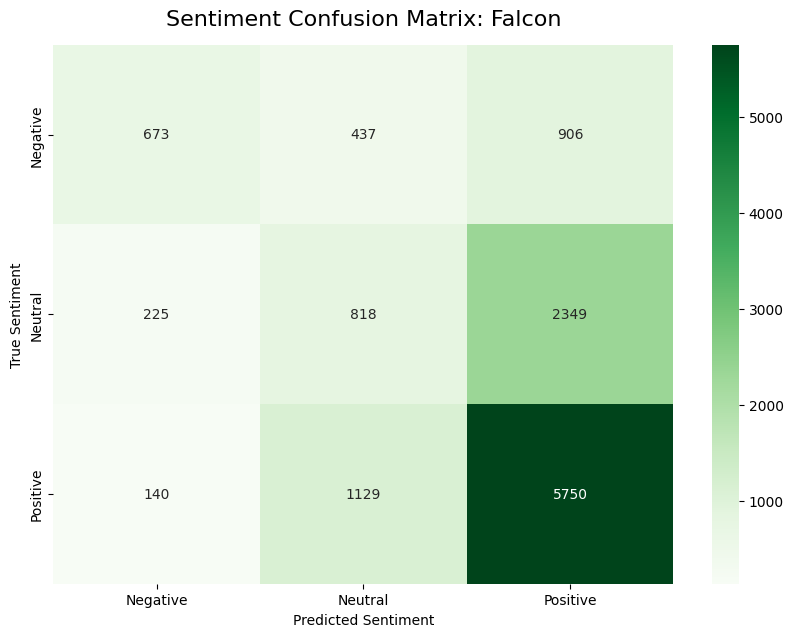

In [17]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix4 = confusion_matrix(conf_mat_falcon['actual_sentiment'], conf_mat_falcon['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Falcon', fontsize=16, pad=14)
plt.show()

In [18]:
accuracy_falcon = accuracy_score(conf_mat_falcon["actual_sentiment"], conf_mat_falcon["generated_sentiment"])
print(f"Overall accuracy: {accuracy_falcon:.3f}")

Overall accuracy: 0.583


In [19]:
from sklearn.metrics import f1_score

# Calculate F1 score
falcon_f1 = f1_score(conf_mat_falcon["actual_sentiment"], conf_mat_falcon["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {falcon_f1:.3f}")

Falcon F1 Score: 0.554


DeciLM 7b Confusion Matrix and Accuracy

In [20]:
deci_sentiment = get_model_sentiment_data('deciLM 7b')
deci_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,50709,3816,deciLM 7b,positive,27177.072266,0.348379
1,50710,3,deciLM 7b,positive,27200.726074,0.281281
2,50711,4,deciLM 7b,negative,27200.142090,0.280755
3,50712,5,deciLM 7b,positive,27197.362793,0.283687
4,50713,6,deciLM 7b,positive,27177.364258,0.213981


In [21]:
conf_mat_deci = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        deci_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_deci.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


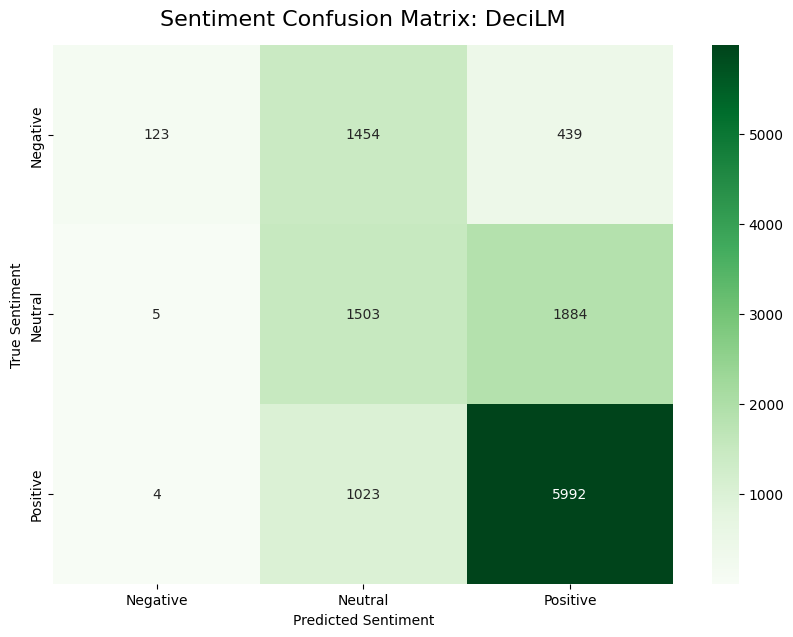

In [22]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix5 = confusion_matrix(conf_mat_deci['actual_sentiment'], conf_mat_deci['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: DeciLM', fontsize=16, pad=14)
plt.show()

In [23]:
accuracy_deci = accuracy_score(conf_mat_deci["actual_sentiment"], conf_mat_deci["generated_sentiment"])
print(f"Overall accuracy: {accuracy_deci:.3f}")

Overall accuracy: 0.613


In [24]:
from sklearn.metrics import f1_score

# Calculate F1 score
deci_f1 = f1_score(conf_mat_deci["actual_sentiment"], conf_mat_deci["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {deci_f1:.3f}")

Falcon F1 Score: 0.571


Orca 2 7b Confusion Matrix & Accuracy

In [25]:
orca_sentiment = get_model_sentiment_data('orca2 7b')
orca_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,63136,3816,orca2 7b,positive,26041.963379,0.353360
1,63137,3,orca2 7b,positive,26204.654785,0.270215
2,63138,4,orca2 7b,negative,26202.532715,0.269059
3,63139,5,orca2 7b,positive,26185.696777,0.270434
4,63140,6,orca2 7b,positive,26041.932129,0.200529


In [26]:
conf_mat_orca = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        orca_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_orca.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


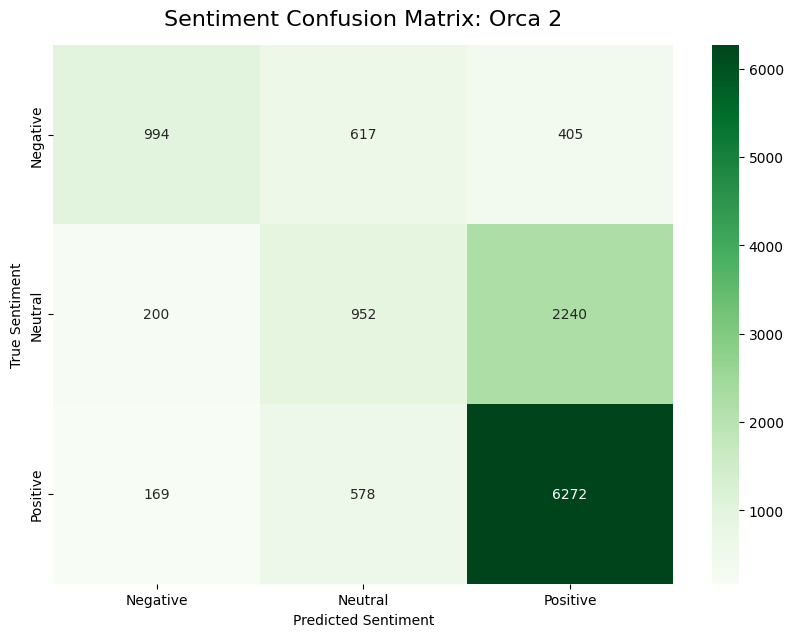

In [27]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix6 = confusion_matrix(conf_mat_orca['actual_sentiment'], conf_mat_orca['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Orca 2', fontsize=16, pad=14)
plt.show()

In [28]:
accuracy_orca = accuracy_score(conf_mat_orca["actual_sentiment"], conf_mat_orca["generated_sentiment"])
print(f"Overall accuracy: {accuracy_orca:.3f}")

Overall accuracy: 0.661


In [29]:
from sklearn.metrics import f1_score

# Calculate F1 score
orca_f1 = f1_score(conf_mat_orca["actual_sentiment"], conf_mat_orca["generated_sentiment"], average='weighted')

print(f"Falcon F1 Score: {orca_f1:.3f}")

Falcon F1 Score: 0.634


In [30]:
bar_df = pd.DataFrame({'mistral 7b': [accuracy_mistral], 'gemma 7b': [accuracy_gemma], 'llama 3 8b':[accuracy_llama3], 'falcon 7b':[accuracy_falcon], 'deciLM 7b':[accuracy_deci], 'orca2 7b':[accuracy_orca]})
bar_df = bar_df.melt(var_name='LLM Model', value_name='Accuracy Score')
bar_df = bar_df.sort_values('Accuracy Score', ascending=True)
bar_df.head()

,LLM Model,Accuracy Score
1,gemma 7b,0.541643
2,llama 3 8b,0.579062
3,falcon 7b,0.582683
0,mistral 7b,0.587752
4,deciLM 7b,0.613020


C:\Users\AViey\AppData\Local\Temp\ipykernel_30148\251473660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


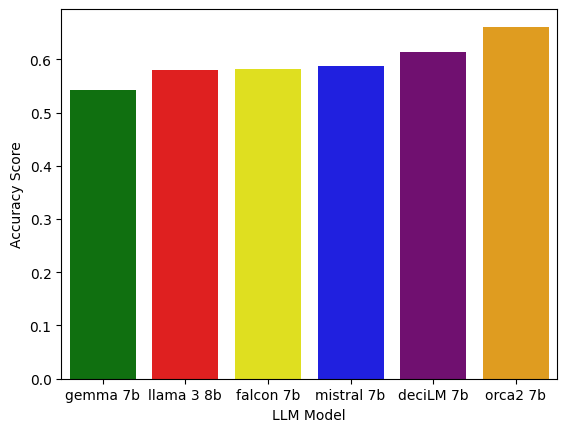

In [31]:
colors = {'mistral 7b': 'blue', 'gemma 7b': 'green', 'llama 3 8b': 'red', 'falcon 7b':'yellow', 'deciLM 7b':'purple', 'orca2 7b':'orange'}
sns.barplot(
    x = "LLM Model",
    y = "Accuracy Score",
    data = bar_df,
    palette=colors
)

plt.show()

In [32]:
bar_df2 = pd.DataFrame({'gemma 7b': [sum(gemma_sentiment['time_sentiment_taken']) / 12427], 'llama 3 8b':[sum(llama3_sentiment["time_sentiment_taken"]) / 12427],  'falcon 7b':[sum(falcon_sentiment["time_sentiment_taken"]) / 12427],
                        'deciLM 7b':[sum(deci_sentiment['time_sentiment_taken']) / 12427], 'orca2 7b':[sum(orca_sentiment['time_sentiment_taken']) / 12427]})
bar_df2 = bar_df2.melt(var_name='LLM Model', value_name='Time Taken Per Row')
bar_df2 = bar_df2.sort_values('Time Taken Per Row', ascending=True)
bar_df2.head()

,LLM Model,Time Taken Per Row
2,falcon 7b,0.302629
4,orca2 7b,0.314167
3,deciLM 7b,0.326180
0,gemma 7b,1.086109
1,llama 3 8b,2.882407


C:\Users\AViey\AppData\Local\Temp\ipykernel_30148\3636765293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


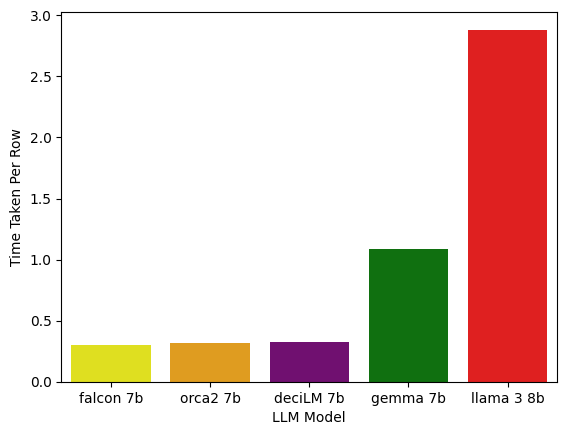

In [33]:
sns.barplot(
    x = "LLM Model",
    y = "Time Taken Per Row",
    data = bar_df2,
    palette=colors
)

plt.show()

In [34]:
stacked_bar = pd.DataFrame({
    'Mistral': mistral_sentiment["generated_sentiment"], 
    'Gemma': gemma_sentiment["generated_sentiment"], 
    'Llama3': llama3_sentiment["generated_sentiment"],
    'Falcon': falcon_sentiment["generated_sentiment"],
    'DeciLM':deci_sentiment["generated_sentiment"],
    'Orca 2': orca_sentiment["generated_sentiment"]
    })
stacked_bar.head()

,Mistral,Gemma,Llama3,Falcon,DeciLM,Orca 2
0,neutral,positive,positive,positive,positive,positive
1,neutral,positive,positive,positive,positive,positive
2,positive,neutral,neutral,positive,negative,negative
3,negative,positive,positive,positive,positive,positive
4,positive,positive,positive,positive,positive,positive


In [35]:
data = {
    'Mistral': stacked_bar["Mistral"].value_counts(),
    'Gemma': stacked_bar["Gemma"].value_counts(),
    'Llama3': stacked_bar["Llama3"].value_counts(),
    'Falcon':stacked_bar['Falcon'].value_counts(),
    'DeciLM':stacked_bar['DeciLM'].value_counts(),
    'Orca 2': stacked_bar['Orca 2'].value_counts()
}

all_categories = ['positive', 'negative', 'neutral']  # add other categories as necessary
stacked_bar = pd.DataFrame(data).reindex(all_categories).fillna(0)

print(stacked_bar)


          Mistral  Gemma  Llama3  Falcon  DeciLM  Orca 2
positive     4702   5956    6362    9005    8315    8917
negative     1466   4474      95    1038     132    1363
neutral      6259   1997    5970    2384    3980    2147


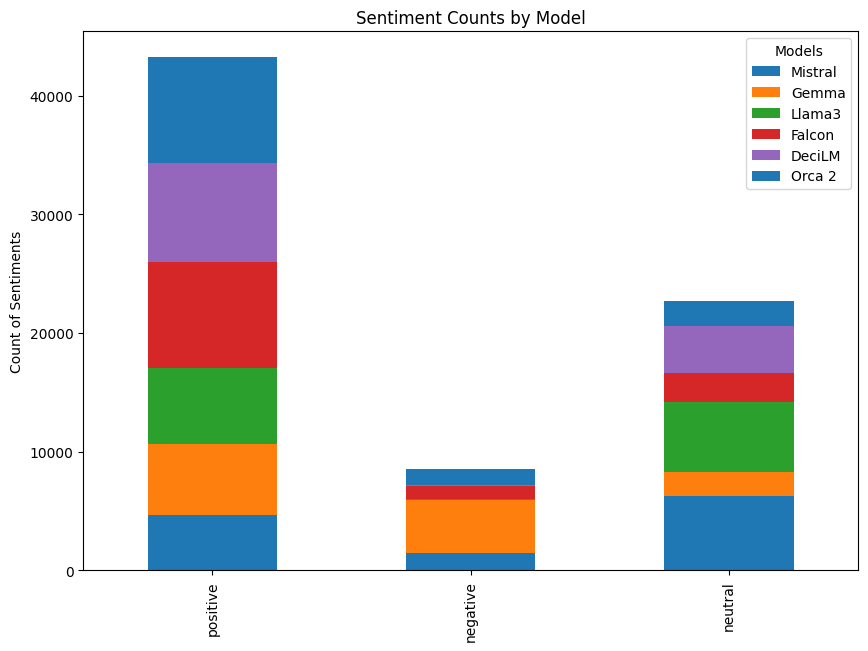

In [39]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
ax = stacked_bar.plot(kind='bar', stacked=True, figsize=(10, 7), color = colors)
ax.set_ylabel('Count of Sentiments')
ax.set_title('Sentiment Counts by Model')
plt.legend(title='Models')
plt.show()
